<a href="https://colab.research.google.com/github/alexanderbandeiralira/EE3-Introducao_a_ciencia_de_dados/blob/main/EE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdução**

Nesta análise, será realizado um estudo sobre inadimplência com o objetivo de identificar padrões e fatores que influenciam o comportamento dos clientes em relação ao pagamento de suas dívidas. Utilizando um conjunto de dados com variáveis socioeconômicas e comportamentais, vamos construir dois modelos de machine learning diferentes para prever a inadimplência. Os modelos serão comparados em termos de desempenho, permitindo avaliar qual deles oferece as melhores previsões e pode ser mais eficaz para tomada de decisões no contexto da análise de crédito.

**Variáveis:**
- **inadimplente**: variável de resposta do modelo, indicando se o cliente está inadimplente (1 para inadimplente, 0 para adimplente);
- **util_linhas_inseguras**: percentual de utilização das linhas de crédito inseguras;
- **idade**: idade do cliente;
- **vezes_passou_de_30_59_dias**: número de vezes que o cliente passou de 30 a 59 dias em atraso no pagamento;
- **razao_debito**: razão entre o valor do débito e o total do crédito disponível;
- **salario_mensal**: salário mensal do cliente;
- **numero_linhas_crdto_aberto**: número de linhas de crédito abertas atualmente em nome do cliente;
- **numero_vezes_passou_90_dias**: número de vezes que o cliente passou 90 dias ou mais em atraso;
- **numero_emprestimos_imobiliarios**: número de empréstimos imobiliários que o cliente possui;
- **numero_de_vezes_que_passou_60_89_dias**: número de vezes que o cliente passou de 60 a 89 dias em atraso no pagamento;
- **numero_de_dependentes**: número de dependentes do cliente.


# **Carregamento de Bibliotecas**

In [ ]:
%pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
%pip install pycaret==3.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 874.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
# <> -----------------------------------------------------
# Lendo as bibliotecas necessárias

# <> -----------------------------
# <> Bibliotecas dos algoritmos
from pycaret.classification import *
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text


# <> Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# <> Biliotecas para manipulação com dados
import pandas as pd
import numpy as np

#**Carregamento dos Dados**

In [ ]:
# <> ------------------------------------------------------
# <> Lendo um dataset de exemplo separados por treino e teste
# <> ------------------------------------------------------
url_train = '/content/treino.csv'

df = pd.read_csv(url_train, sep=",") #dados_

#**Tratamento dos Dados**

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se os tipos foram lidos corretamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [ ]:
df.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


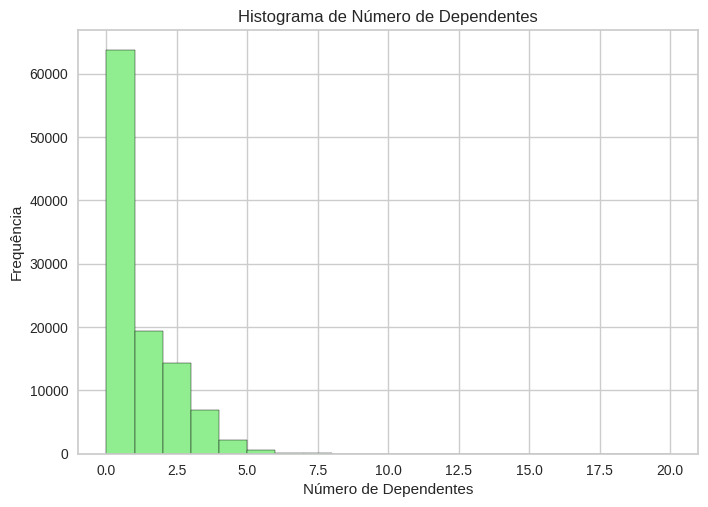

In [ ]:
# Gerando o histograma da variável numero_de_dependentes
plt.hist(df['numero_de_dependentes'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de Número de Dependentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Frequência')
plt.show()

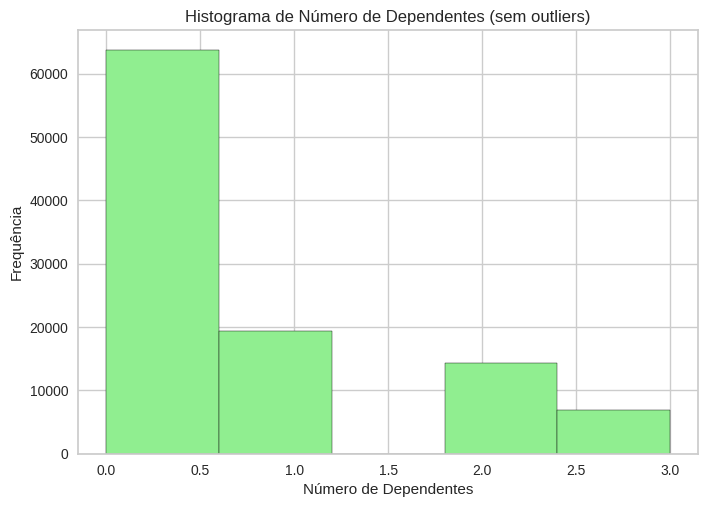

In [ ]:
# Verificando os percentis para limitar valores extremos
numero_de_dependentes_limite_superior = df['numero_de_dependentes'].quantile(0.95)
numero_de_dependentes_limite_superior_filtrado = df[df['numero_de_dependentes'] <= numero_de_dependentes_limite_superior]['numero_de_dependentes']

# Gerando o histograma da variável numero_de_dependentes
plt.hist(numero_de_dependentes_limite_superior_filtrado, bins=5, color='lightgreen', edgecolor='black')
plt.title('Histograma de Número de Dependentes (sem outliers)')
plt.xlabel('Número de Dependentes')
plt.ylabel('Frequência')
plt.show()

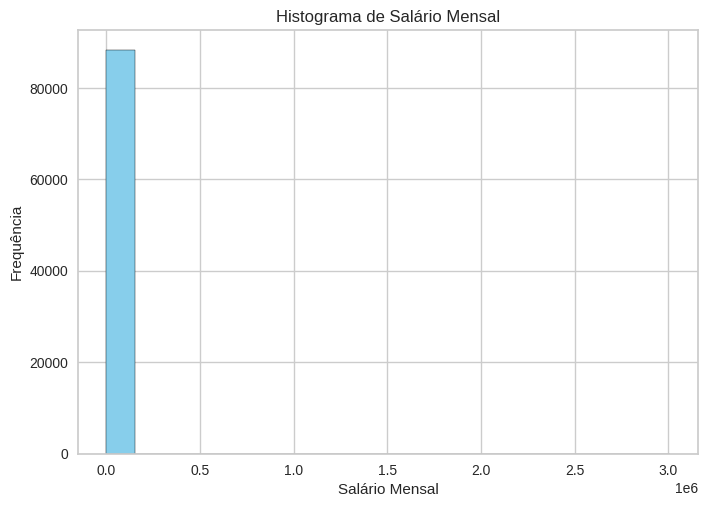

In [ ]:
# Gerando o histograma da variável salario_mensal
plt.hist(df['salario_mensal'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Salário Mensal')
plt.xlabel('Salário Mensal')
plt.ylabel('Frequência')
plt.show()

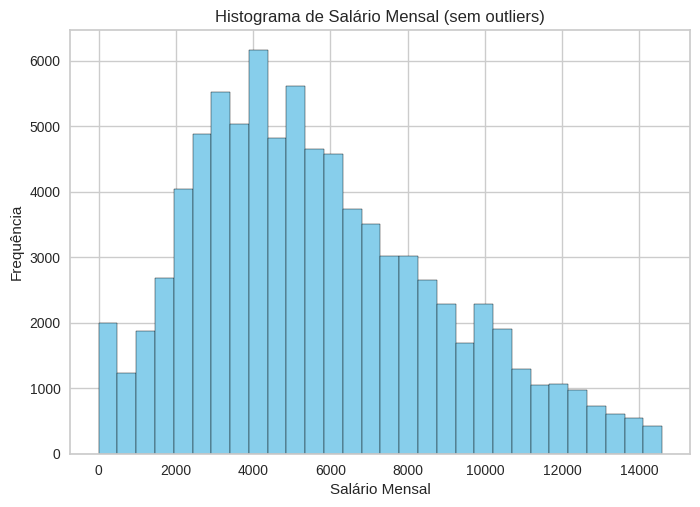

In [ ]:
# Verificando os percentis para limitar valores extremos
salario_limite_superior = df['salario_mensal'].quantile(0.95)
salario_mensal_filtrado = df[df['salario_mensal'] <= salario_limite_superior]['salario_mensal']

# Gerando o histograma da variável salario_mensal com valores filtrados
plt.hist(salario_mensal_filtrado, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Salário Mensal (sem outliers)')
plt.xlabel('Salário Mensal')
plt.ylabel('Frequência')
plt.show()


### A partir da distribuição dos dados é possível que na variável salario mensal possamos utilizar para substituir os valores nulos tanto a média como a mediana categorizado por idade por conta de termos uma distribuição aparentemente normal, mas como alcançamos isso apenas com a retirada dos outliers, verificaremos a performance primeiro com a mediana.

### Já o número de dependentes mediana provavelmente será uma opção melhor por conta da assimetria encontrada.

In [ ]:
# Calculando a média de salário por idade e preenchendo os valores nulos
#df['salario_mensal'] = df.groupby('idade')['salario_mensal'].transform(lambda x: x.fillna(x.mean()))
df['salario_mensal'] = df.groupby('idade')['salario_mensal'].transform(lambda x: x.fillna(x.median()))

# Calculando o numero_de_dependentes e preenchendo os valores nulos
#df['numero_de_dependentes'] = df['numero_de_dependentes'].fillna(df['numero_de_dependentes'].mean())
df['numero_de_dependentes'] = df['numero_de_dependentes'].fillna(df['numero_de_dependentes'].median())


# Verificando se os valores nulos foram preenchidos
df.isnull().sum()

,0
inadimplente,0
util_linhas_inseguras,0
idade,0
vezes_passou_de_30_59_dias,0
razao_debito,0
salario_mensal,3
numero_linhas_crdto_aberto,0
numero_vezes_passou_90_dias,0
numero_emprestimos_imobiliarios,0
numero_de_vezes_que_passou_60_89_dias,0


In [ ]:
df[df['salario_mensal'].isnull()]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
40007,0,0.064748,107,0,939.0,NaN,9,0,1,0,0.0
56761,0,0.003469,105,0,2.0,NaN,4,0,0,0,0.0
105790,0,0.109307,109,0,2141.0,NaN,17,0,1,0,0.0


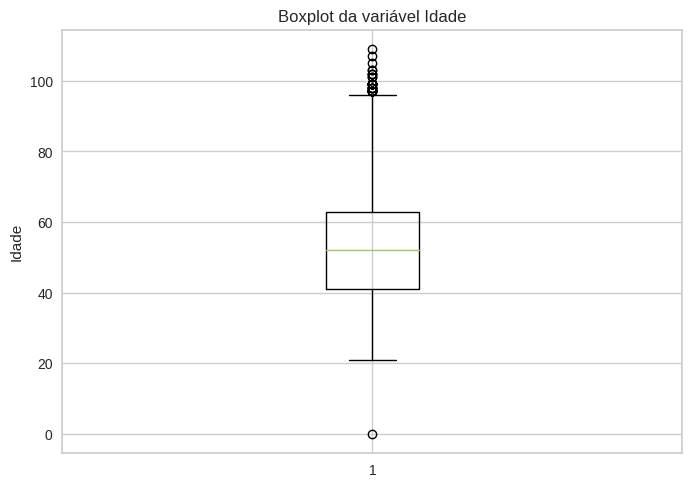

In [ ]:
# Criando o boxplot da variável 'idade'
plt.boxplot(df['idade'])
plt.title('Boxplot da variável Idade')
plt.ylabel('Idade')
plt.show()


### São Outliers na idade, por isso serão excluídos.

In [ ]:
df = df.dropna(subset=['salario_mensal'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109997 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           109997 non-null  int64  
 1   util_linhas_inseguras                  109997 non-null  float64
 2   idade                                  109997 non-null  int64  
 3   vezes_passou_de_30_59_dias             109997 non-null  int64  
 4   razao_debito                           109997 non-null  float64
 5   salario_mensal                         109997 non-null  float64
 6   numero_linhas_crdto_aberto             109997 non-null  int64  
 7   numero_vezes_passou_90_dias            109997 non-null  int64  
 8   numero_emprestimos_imobiliarios        109997 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  109997 non-null  int64  
 10  numero_de_dependentes                  109997 non-null  float

#**Análise Exploratória**

In [ ]:
df['inadimplente'].value_counts()

,count
inadimplente,
0,102666
1,7331


<Axes: xlabel='inadimplente', ylabel='count'>

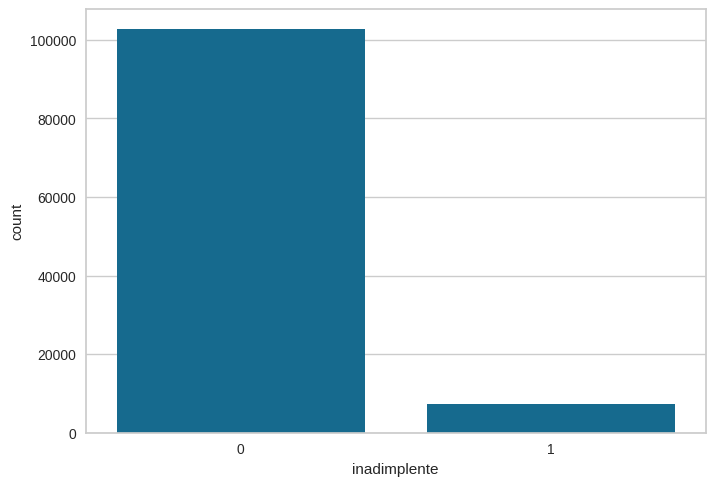

In [ ]:
sns.countplot(x=df['inadimplente'])

In [ ]:
df.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,109997.000000,109997.000000,109997.000000,109997.000000,109997.000000,1.099970e+05,109997.000000,109997.000000,109997.000000,109997.000000,109997.000000
mean,0.066647,5.930140,52.254143,0.424066,354.805247,6.400301e+03,8.445530,0.269962,1.019901,0.243898,0.737684
std,0.249411,252.305404,14.765672,4.240837,2074.160693,1.200565e+04,5.139013,4.217384,1.136000,4.204194,1.106625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175013,3.776000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155940,52.000000,0.000000,0.366667,5.552000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562812,63.000000,0.000000,0.866815,7.380000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Informações que podem ser consideradas mais para frente na análise

1. **Desbalanceamento da Classe**: A variável `inadimplente` apresenta um valor médio de 0.066, indicando que apenas cerca de 6,7% dos registros são de inadimplentes. Isso pode causar problemas de desbalanceamento na modelagem. Técnicas de balanceamento, como oversampling ou undersampling, podem ser necessárias.

2. **Idade**: A média de idade (52.25 anos) e a faixa (0 a 103 anos) sugerem uma distribuição possivelmente assimétrica. É possível que testemos alguma transformações, como logaritmo, tratar ou excluir os outliers.

3. **Variáveis com Alto Desvio Padrão**: Variáveis como `salario_mensal` e `numero_linhas_crdto_aberto` têm altos desvios padrão em relação à média. Isso pode indicar a presença de outliers que podem afetar a modelagem. É possível que testemos alguma transformações, como logaritmo, tratar ou excluir os outliers.

4. **Dependentes**: A média de dependentes é relativamente baixa (0.74), com um máximo de 20. Pode ser interessante analisar como a quantidade de dependentes influencia a inadimplência.

# **Modelagem**

In [ ]:
##### Balancendo a variável inadimplente #####

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['inadimplente'])

# Separando as variáveis independentes e a variável resposta no conjunto de treino
X_train = df_train.drop(columns=['inadimplente'])
y_train = df_train['inadimplente']

# Aplicando SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
df_train_balanced = pd.DataFrame(X_resampled, columns=X_train.columns)
df_train_balanced['inadimplente'] = y_resampled

# Verificando a nova contagem das classes no conjunto de treino balanceado
print(df_train_balanced['inadimplente'].value_counts())


inadimplente
0    82132
1    82132
Name: count, dtype: int64


Esse balanceamento é necessário porque como estamos lidando com inadimplencia, nosso maior interesse de termos maior acerto é justamente aqueles que tem chance de inadimplencia pois trazem prejuízo.

In [ ]:
# <> ------------------------------------------------------
# <> Dividindo em treino e teste
df_train, df_test = train_test_split(df_train_balanced,test_size=.2)

### **Decision Tree**

In [ ]:
# <> ------------------------------------------------------
# <> Configurar o ambiente PyCaret com dados de treino e teste informados manualmente
cdt = setup(data = df_train,
            target = 'inadimplente', # Nome da coluna de classes
            test_data = df_test,
            session_id = 123, # session_id para reprodutibilidade
            index = False)

,Description,Value
0,Session id,123
1,Target,inadimplente
2,Target type,Binary
3,Original data shape,"(164264, 11)"
4,Transformed data shape,"(164264, 11)"
5,Transformed train set shape,"(131411, 11)"
6,Transformed test set shape,"(32853, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# <> ------------------------------------------------------
# <> Criando o modelo 'dt': Decision Tree
dt_model = create_model('dt', max_depth = 3, min_samples_split = 2, cross_validation = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7496,0.8256,0.8661,0.6998,0.7741,0.5003,0.5147


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rt_testing_pred = predict_model(dt_model, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7496,0.8256,0.8661,0.6998,0.7741,0.5003,0.5147


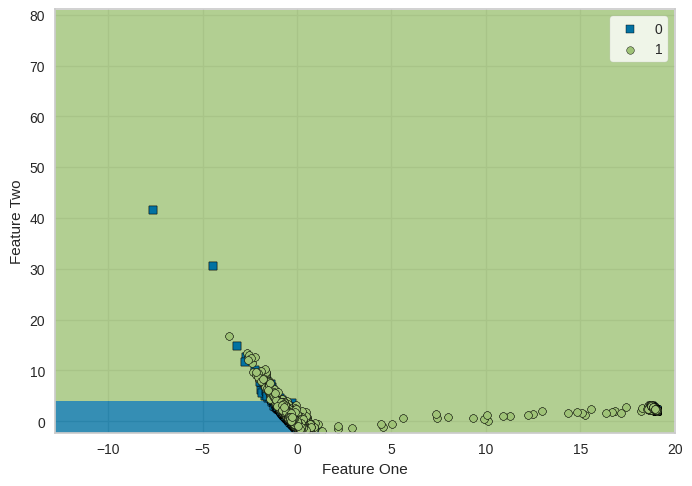

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(dt_model, plot = 'boundary')

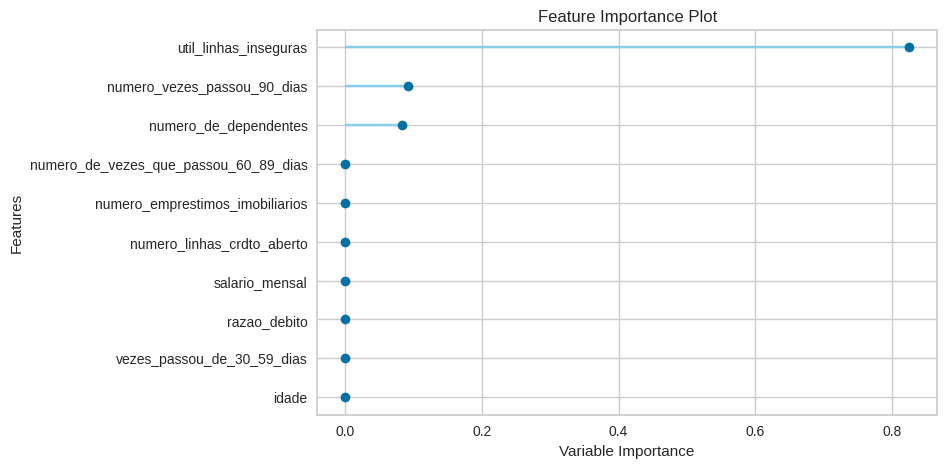

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
# <> as variáveis mais importantes
plot_model(dt_model, plot = 'feature')

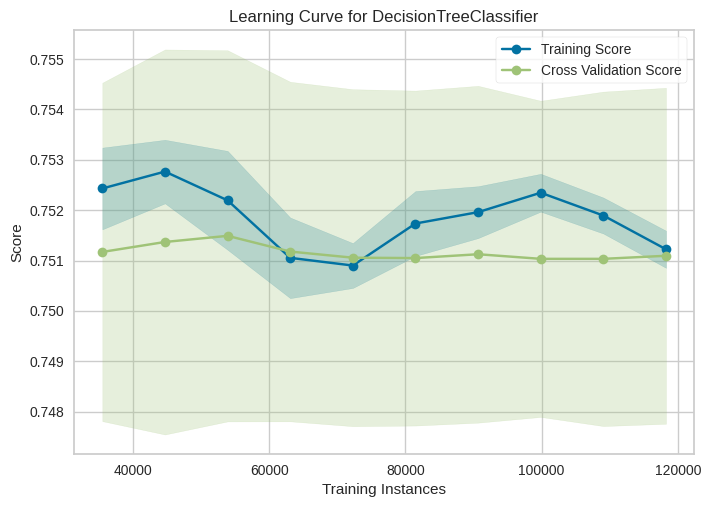

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(dt_model, plot = 'learning')

In [ ]:
# <> -------------------------------------------
# <> Visualizando a estrutura da Árvore
estrutura_DT = export_text(dt_model)
print(estrutura_DT)

|--- feature_0 <= 0.29
|   |--- feature_0 <= 0.11
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 1
|   |--- feature_0 >  0.11
|   |   |--- feature_9 <= 0.00
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.00
|   |   |   |--- class: 0
|--- feature_0 >  0.29
|   |--- feature_6 <= 0.50
|   |   |--- feature_9 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.00
|   |   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_9 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_9 >  0.00
|   |   |   |--- class: 1



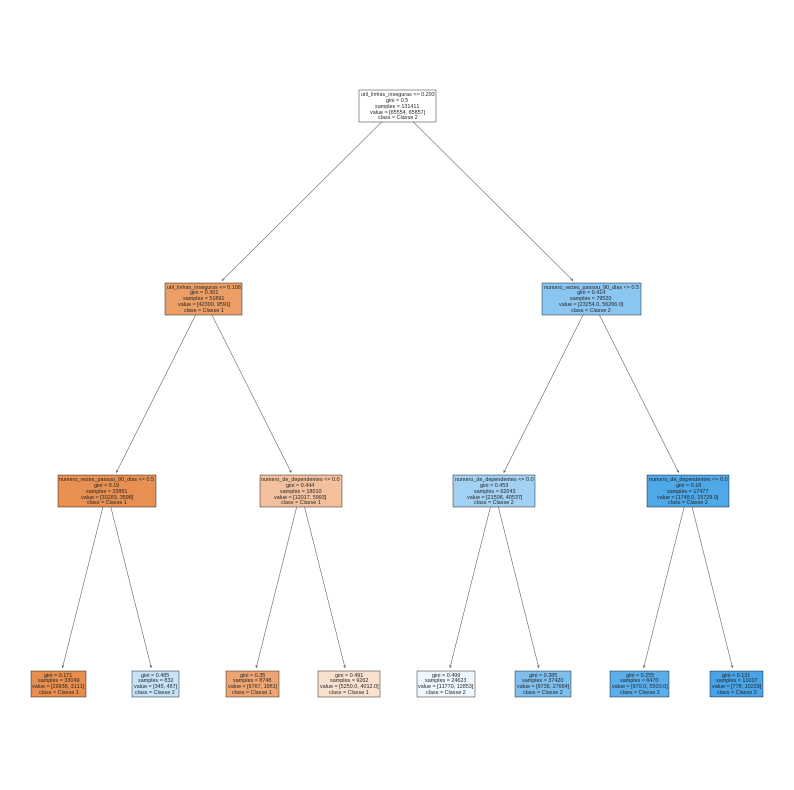

In [ ]:
# <> -------------------------------------------
# <> Plotar a árvore de decisão
plt.figure(figsize=(10,10))
plot_tree(dt_model, filled=True, feature_names=df_train.columns,
          class_names=['Classe 1', 'Classe 2'])  # Ajuste os nomes das classes conforme necessário
plt.show()

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
dt_testing_pred = predict_model(dt_model, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7496,0.8256,0.8661,0.6998,0.7741,0.5003,0.5147


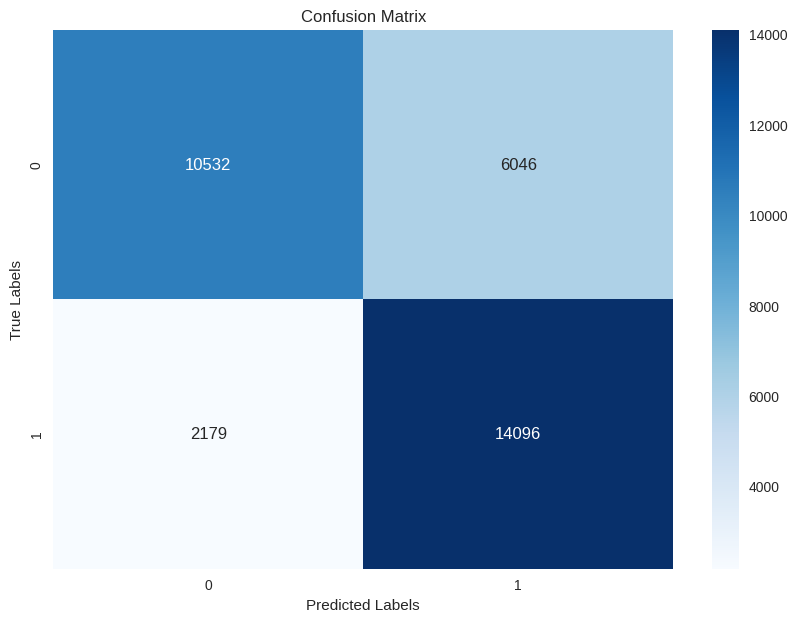

Accuracy: 0.7496423462088698
Kappa: 0.5003270713933081
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72     16578
           1       0.70      0.87      0.77     16275

    accuracy                           0.75     32853
   macro avg       0.76      0.75      0.75     32853
weighted avg       0.76      0.75      0.75     32853



In [ ]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = dt_testing_pred['inadimplente']
predicted_labels = dt_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)

### **Random Forest**

In [ ]:
# <> ------------------------------------------------------
# <> Configurar o ambiente PyCaret com dados de treino e teste informados manualmente
cdt = setup(data = df_train,
            target = 'inadimplente', # Nome da coluna de classes
            test_data = df_test,
            #session_id = 123, # session_id para reprodutibilidade
            index = False)

,Description,Value
0,Session id,3733
1,Target,inadimplente
2,Target type,Binary
3,Original data shape,"(164264, 11)"
4,Transformed data shape,"(164264, 11)"
5,Transformed train set shape,"(131411, 11)"
6,Transformed test set shape,"(32853, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
rf_model = create_model('rf', n_estimators = 100, max_depth = 3, min_samples_split = 2, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7718,0.8625,0.8575,0.7326,0.7902,0.5433,0.5514
1,0.7757,0.8655,0.8538,0.7391,0.7923,0.5512,0.5580
2,0.7716,0.8603,0.8571,0.7325,0.7899,0.5429,0.5510
3,0.7752,0.8655,0.8478,0.7410,0.7908,0.5503,0.5561
4,0.7748,0.8624,0.8529,0.7384,0.7915,0.5495,0.5563
Mean,0.7738,0.8633,0.8538,0.7367,0.7909,0.5474,0.5546
Std,0.0018,0.0020,0.0035,0.0035,0.0009,0.0036,0.0028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=3733, verbose=0,
                       warm_start=False)


In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rt_testing_pred = predict_model(rf_model, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7760,0.8662,0.8610,0.7333,0.7920,0.5527,0.5611


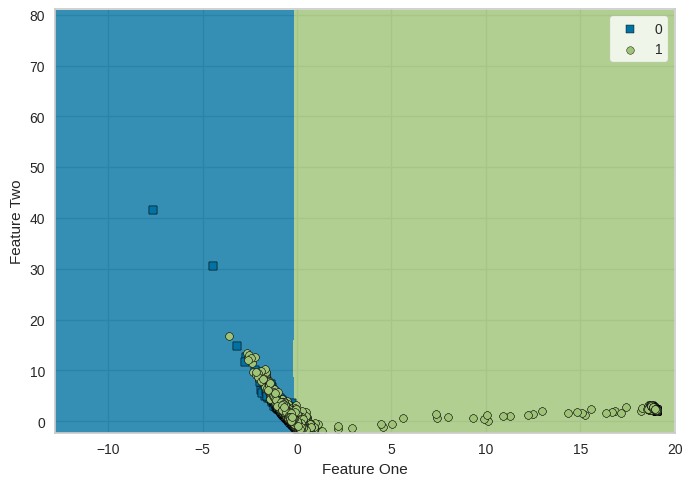

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_model, plot = 'boundary')

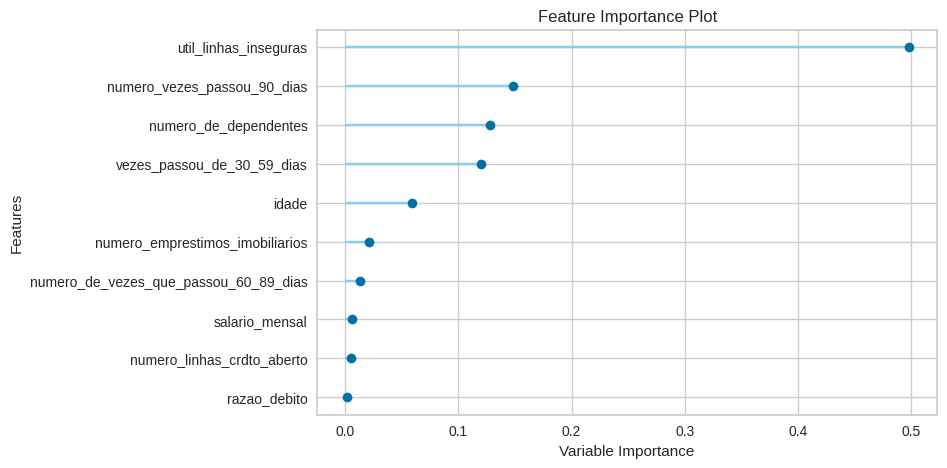

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
# <> as variáveis mais importantes
plot_model(rf_model, plot = 'feature')

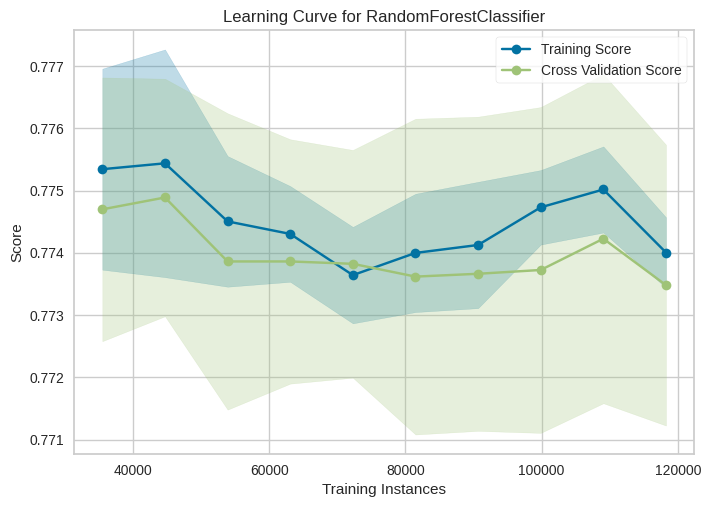

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico
plot_model(rf_model, plot = 'learning')

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rf_testing_pred = predict_model(rf_model, data = df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7760,0.8662,0.8610,0.7333,0.7920,0.5527,0.5611


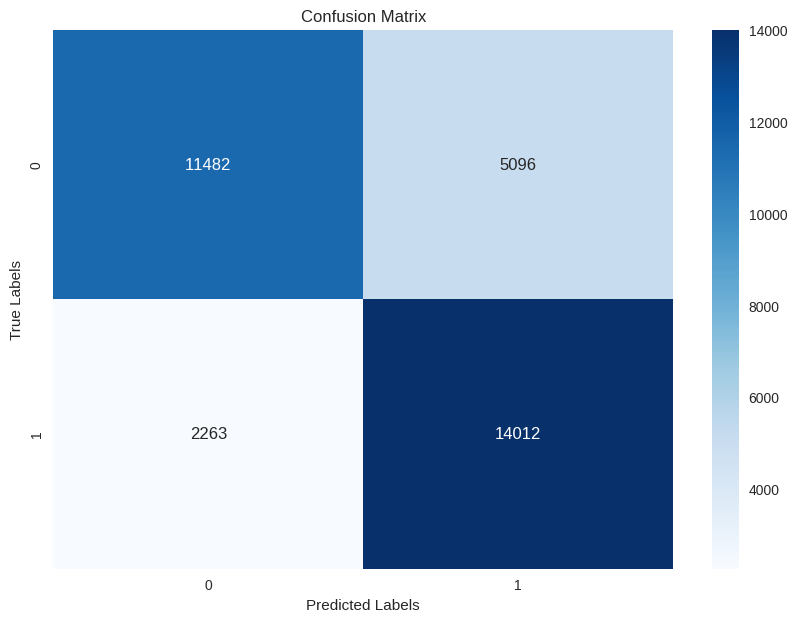

Accuracy: 0.7760021915806775
Kappa: 0.5526778570385158
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76     16578
           1       0.73      0.86      0.79     16275

    accuracy                           0.78     32853
   macro avg       0.78      0.78      0.77     32853
weighted avg       0.78      0.78      0.77     32853



In [ ]:
# Supondo que 'true_labels' seja a coluna de rótulos verdadeiros e 'predicted_labels' a coluna de rótulos previstos
true_labels = rf_testing_pred['inadimplente']
predicted_labels = rf_testing_pred['prediction_label']

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular acurácia
accuracy = accuracy_score(true_labels, predicted_labels)

# Calcular coeficiente Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Gerar relatório de classificação
classification_rep = classification_report(true_labels, predicted_labels)

# Exibir as métricas
print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')
print('Classification Report:')
print(classification_rep)